In [11]:
from mpmath import zeta
import numpy as np 
import sympy
import matplotlib.pyplot as plt 
import pyprimes
import seaborn as sns

In [2]:
# Developed Libraries
from Zeta_Algorithms import zetaStochastic

In [3]:
# <img src="zeta_critical_line.jpg" width="600" height="600">

**The Riemann Zeta function is defined as:**
$$\zeta(s):=\sum_{n=1}^\infty{n^{-s}} \ \ \ \ : \ (s=\sigma + it) \ \ ; \ (\sigma > 1)$$

Our Zeta Stochastic Function is defined $(\ X_T(h),\  h\in I)$, this follows as 
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}Re(p^{ih}e^{i\theta_p})$$
Where $p$ refers to the primes, $Re$ is concerned witht the 'real' part of the expression $p^{ih}e^{i\theta_p}$ and $\theta_p \sim U(0,2\pi) \ IID$

Through... we have the following
$$X_T(h) = \sum_{p\leq T}\cdot \frac{1}{\sqrt{p}}cos(\theta_p - hlog(p))$$

In [4]:
# Stores prime list up to 10^8
# This minimizes runtime by limiting the creation of the prime list 
prime_num = list(pyprimes.primes_below(1e8))

In [7]:
T_val = int(1e6)

# create range interval of h from -1 to 1
x=np.arange(-1,1,1/100)

# create stochastic zeta range over h interval  
sims = 10
y = np.array([[zetaStochastic(h=i, T=T_val, prime_list=prime_num) for i in x] for _ in range(sims)]).reshape(sims, 200)

In [8]:
y

array([[-0.5627564 , -0.22899247, -0.77713163, ..., -1.68462287,
         2.1399851 ,  1.75309871],
       [-1.2621083 ,  1.17097488, -1.69496098, ...,  0.38619871,
         0.51119982,  0.58008828],
       [-1.39794727,  0.26091429, -0.32422856, ..., -1.24518133,
         0.14143937, -1.74496477],
       ...,
       [ 0.0771411 ,  0.62299356,  1.49265527, ...,  0.71807942,
        -0.33180828,  0.66511852],
       [-0.43847374,  0.55483074,  0.78875145, ...,  2.09395899,
         2.00269427, -0.86644646],
       [ 0.86153832,  1.83676152,  1.71066805, ...,  0.7627276 ,
         1.21486062, -0.76422672]])

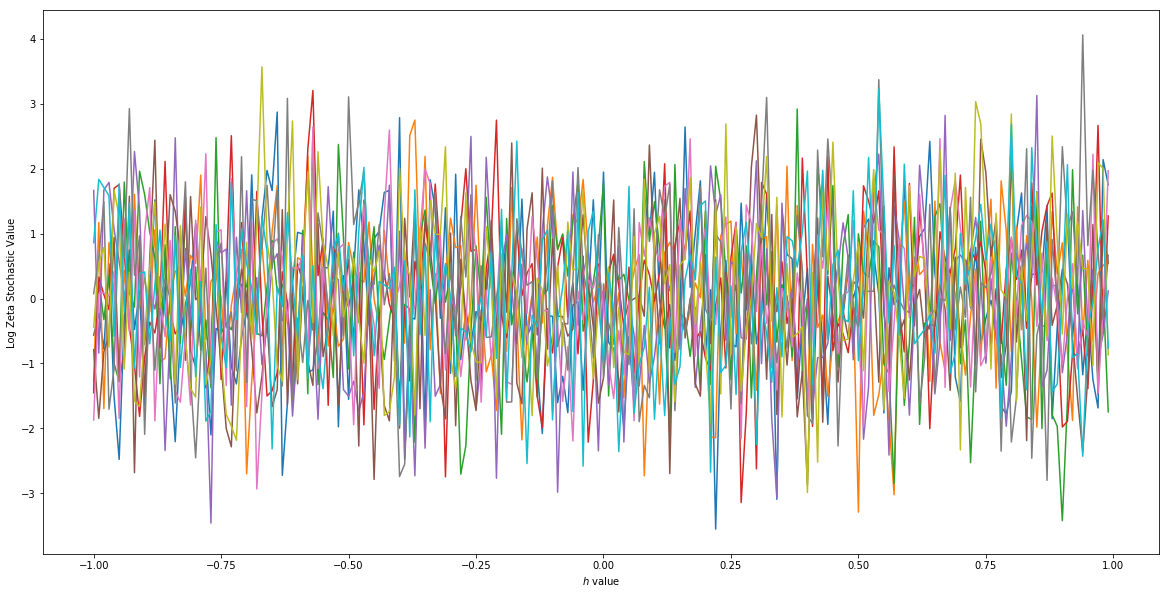

In [10]:
plt.figure(figsize=(20,10))  
for i in range(10):
    plt.plot(x, y[i])
plt.ylabel('Log Zeta Stochastic Value')
plt.xlabel('$h$ value')
plt.show()

**Computations of the Riemann Zeta function on the critical line refer to computations of the form $\zeta(\frac{1}{2} + it)$, where we move vertically along the complex plane with $t$, while being fixed at the point $\frac{1}{2}$ on the real number line. We will be using an existing implementation of the Zeta function in Python, defined in the documentation provided, http://mpmath.org/doc/current/functions/zeta.html?highlight=zeta#mpmath.zeta** 



In [17]:
N = 0   # 100000 starting value 
deltaN = 501    # interval range of T

In [18]:
# creating the interval range t
t_range=np.arange(N, N+deltaN)

In [39]:
# storage for the normal zeta 
norm_zeta_value = np.array([0.0]*deltaN)

# computing the Zeta function over a small interval defined by deltaN
for t in t_range:
    point = complex(real=0.5, imag=t)
    zeta_value = zeta(point)
    
    # computes the normalized zeta function 
    norm_zeta_value[t-N] = abs(zeta_value)

# average of norm function 
average = np.cumsum(norm_zeta_value)/(t_range+1)

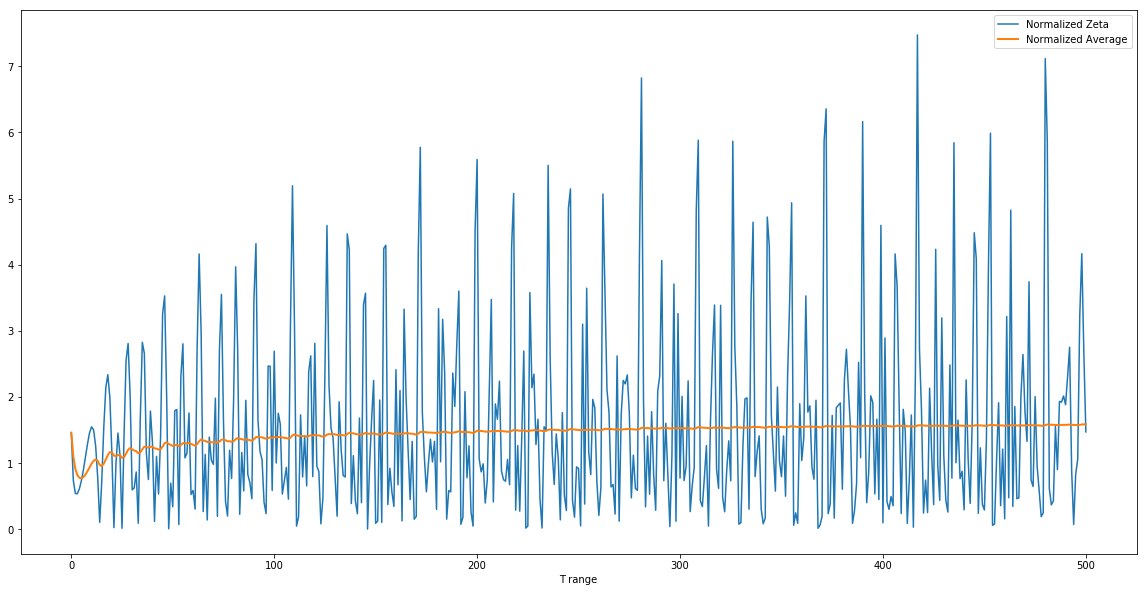

In [42]:
plt.figure(figsize=(20,10))  
plt.plot(t_range, norm_zeta_value, label='Normalized Zeta')
plt.plot(t_range, average, label='Normalized Average', lw=2)
plt.xlabel('T range')
plt.legend()
plt.show()